In [1]:
import numpy as np
import pandas as pd 
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

# Data Visualization 

In [2]:
directory = "D:\ExcelR\Data Science\Project\Dysarthria Disease Detection"
data = pd.read_csv(r"D:\ExcelR\Data Science\Project\Dysarthria Disease Detection\torgo_data\data.csv")
data['filename'] = data['filename'].apply(lambda x: os.path.join(directory,x))
data

,is_dysarthria,gender,filename
0,non_dysarthria,female,D:\ExcelR\Data Science\Project\Dysarthria Dise...
1,non_dysarthria,female,D:\ExcelR\Data Science\Project\Dysarthria Dise...
2,non_dysarthria,female,D:\ExcelR\Data Science\Project\Dysarthria Dise...
3,non_dysarthria,female,D:\ExcelR\Data Science\Project\Dysarthria Dise...
4,non_dysarthria,female,D:\ExcelR\Data Science\Project\Dysarthria Dise...
...,...,...,...
1995,dysarthria,male,D:\ExcelR\Data Science\Project\Dysarthria Dise...
1996,dysarthria,male,D:\ExcelR\Data Science\Project\Dysarthria Dise...
1997,dysarthria,male,D:\ExcelR\Data Science\Project\Dysarthria Dise...
1998,dysarthria,male,D:\ExcelR\Data Science\Project\Dysarthria Dise...


In [3]:
def show_waveplot(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f"Waveplot: of Class: {label}, Gender: {gender}")

def show_spectrogram(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20,6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='plasma')
    plt.colorbar()
    plt.title(f"Spectrogram of Class: {label}, Gender: {gender}")
    
    
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

    
def show_mfccs(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'MFCC of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
    plt.show()
    
def show_melspectro(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'Mel Spectro of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    melspectro = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(melspectro, sr=sr, x_axis='time',cmap='plasma')
    plt.show()

In [4]:
data.sample(frac=1).reset_index(drop=True,inplace=True)
male_dysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='dysarthria')].sample(1)
female_dysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='dysarthria')].sample(1)
male_ndysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='non_dysarthria')].sample(1)
female_ndysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='non_dysarthria')].sample(1)

## Male with Dysarthria

In [5]:
ipd.Audio(male_dysarthric.iloc[0].filename)

## Female with Dysarthria

In [6]:
ipd.Audio(female_dysarthric.iloc[0].filename)

## Male (Non-Dysarthria)

In [7]:
ipd.Audio(male_ndysarthric.iloc[0].filename)

## Female (Non-Dysarthria)

In [8]:
ipd.Audio(female_ndysarthric.iloc[0].filename)

## Waveplots
- For the dysarthric samples it can be observed that the one male sample taken here has a slurred speech as is evident by the waveplot, while for the female sample the speech is quite rapid and difficult to understand due to the words overlapping with each other as is indicative by the box like patterns forming in the waveplot
- The Non dysarthric samples have a regular waveplot indicating a regular paced speech 

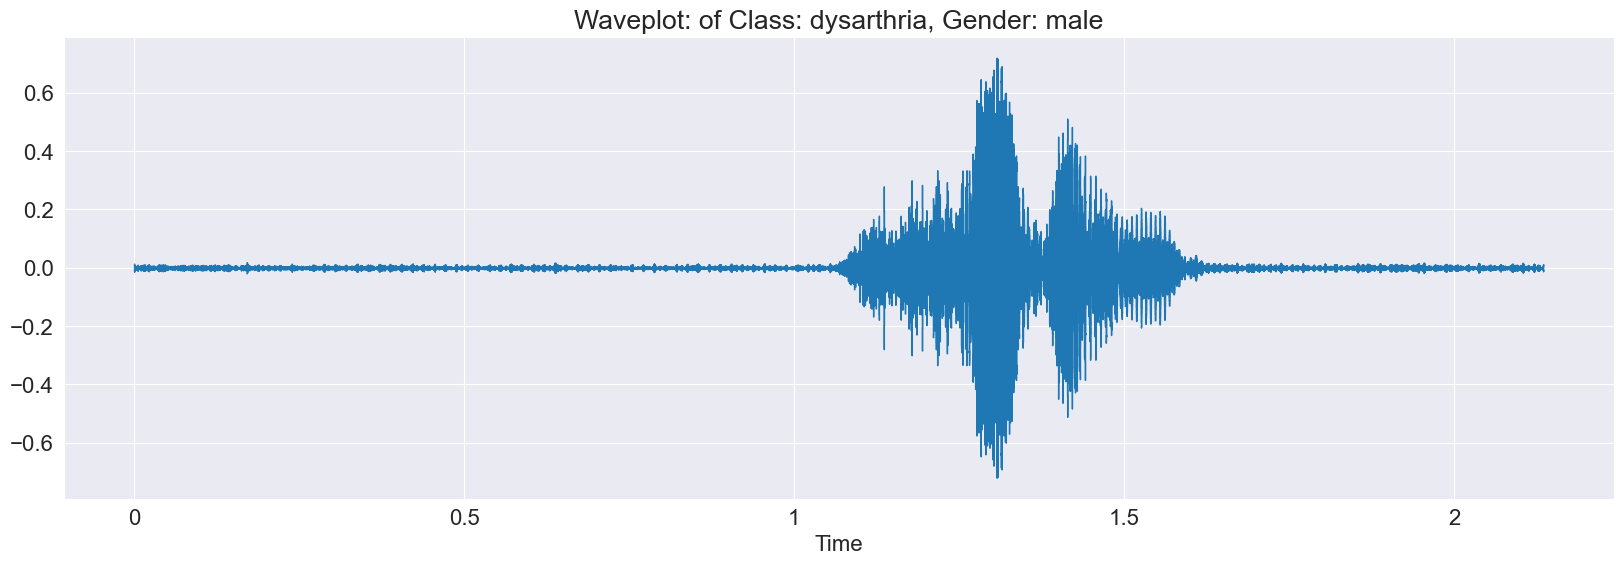

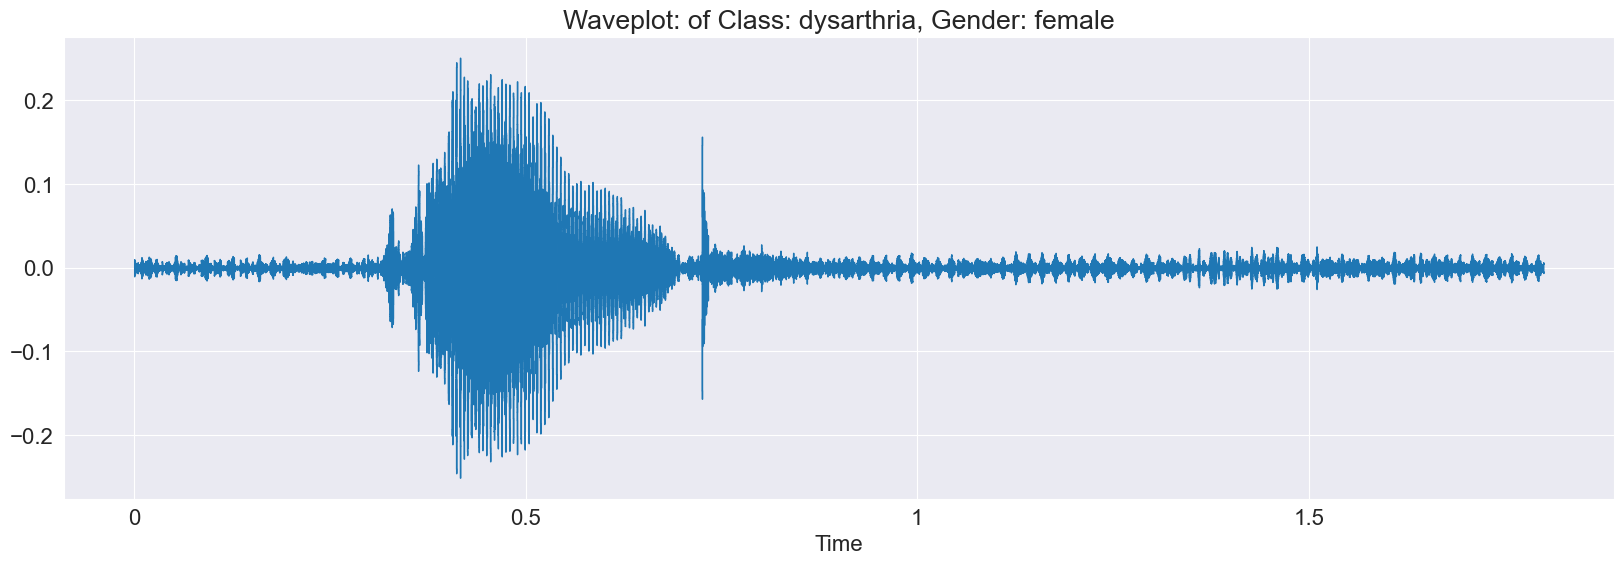

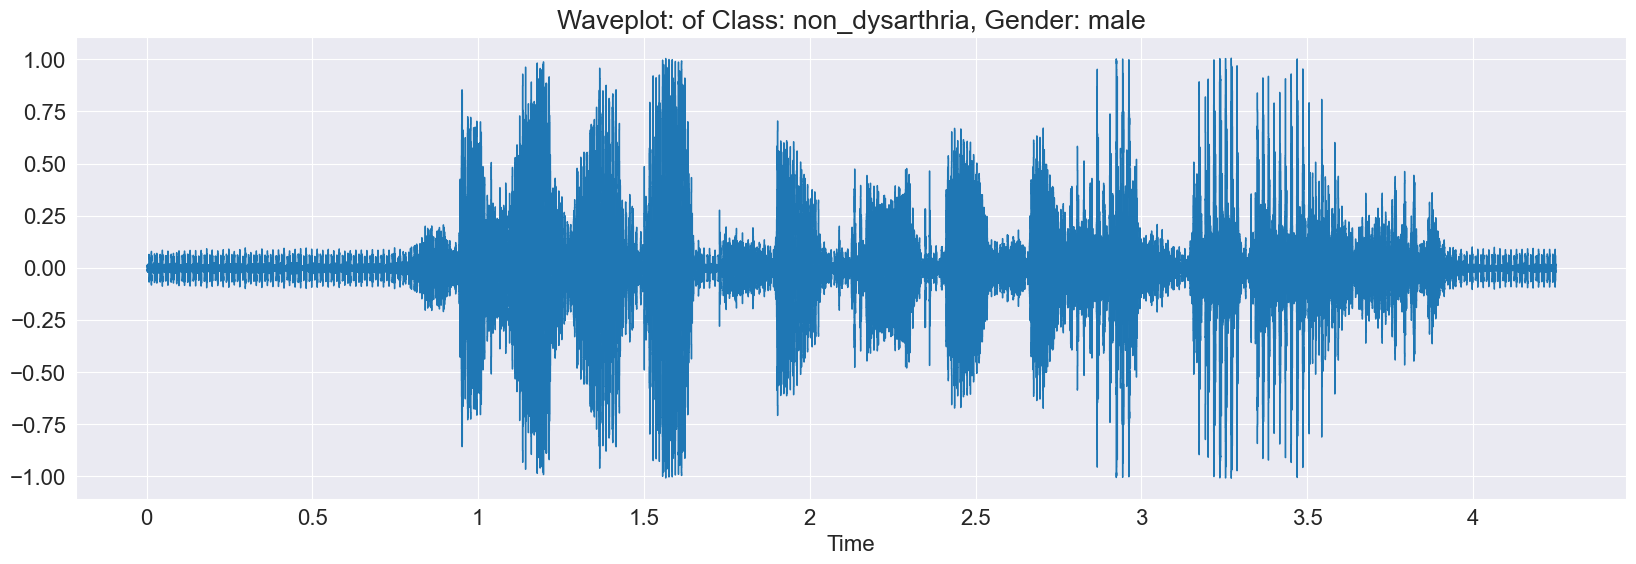

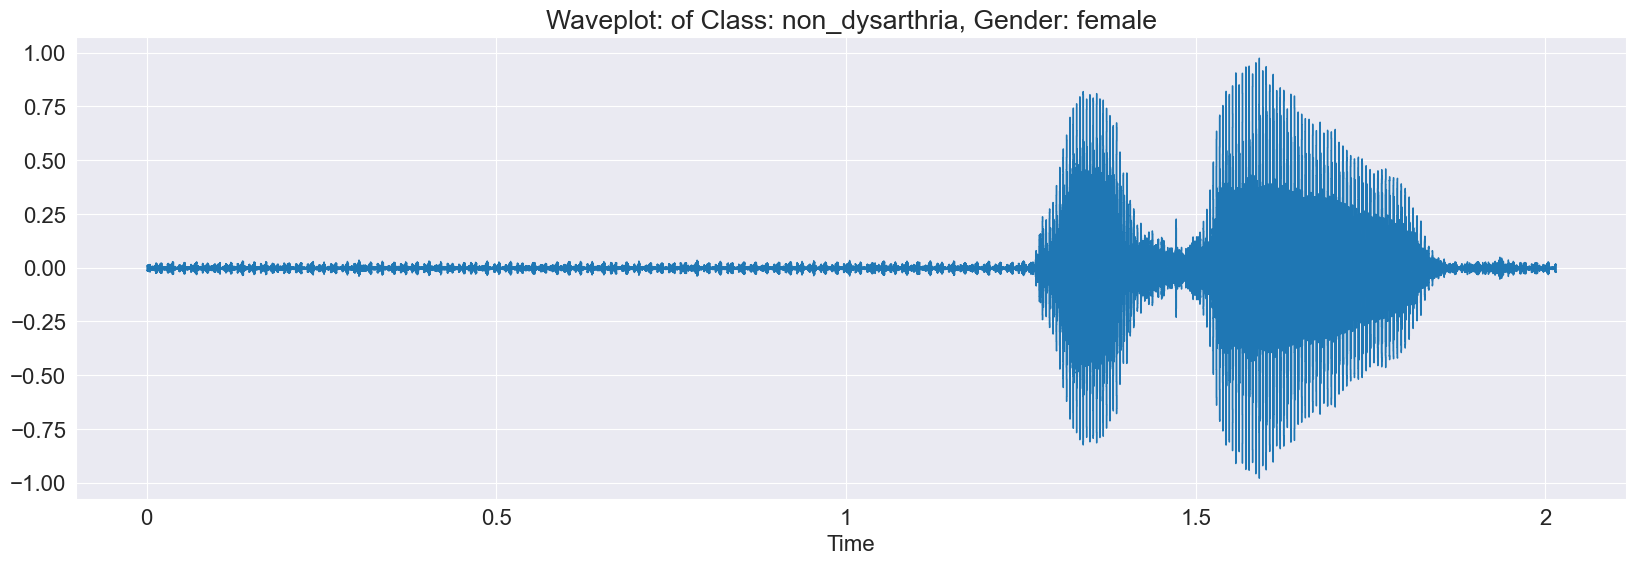

In [9]:
show_waveplot(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_waveplot(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_waveplot(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_waveplot(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectrograms
- For the dysarthric samples it can be seen that the energy magnitudes of the frequencies are more spread out across time, indicative of slow and slurred speech or due to the fact that the words are coming out more rapidly and are overlapping with each other. Similar patterns might also be possible for a person who is dysarthric and speaks monotonously 
- For the Non dysarthric samples it can be seen that the energy magnitudes are more narrowed to only the parts where they have spoken something, which is regular paced

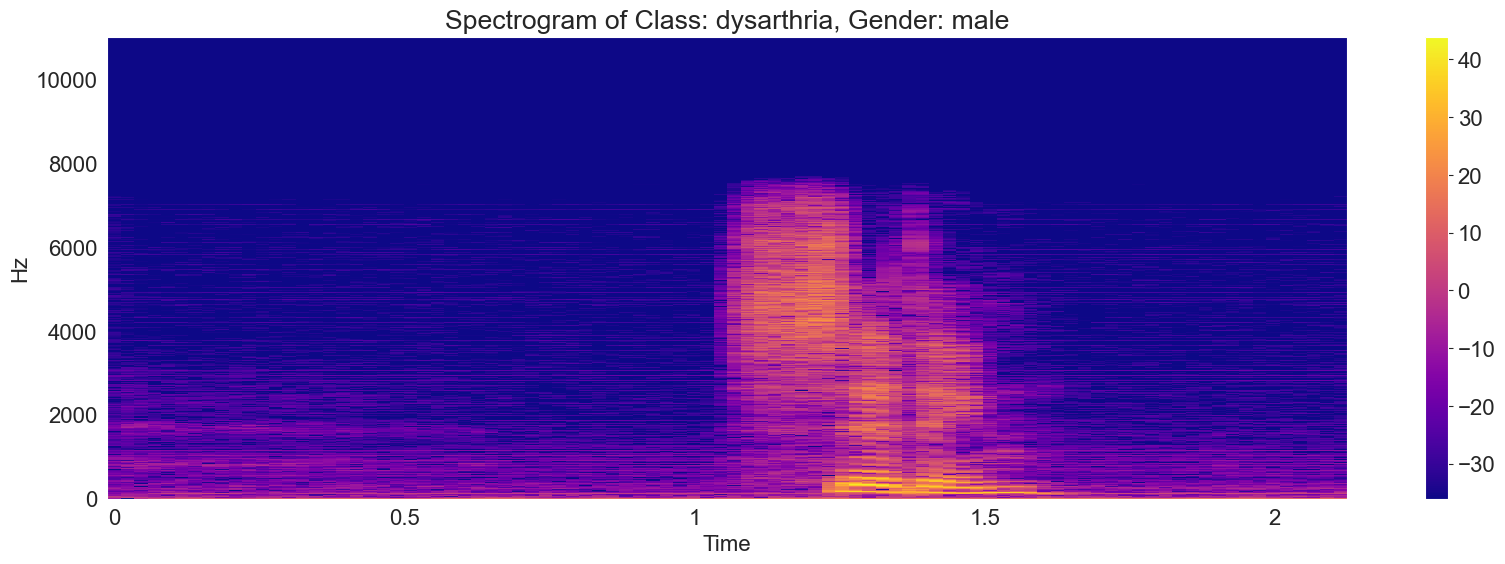

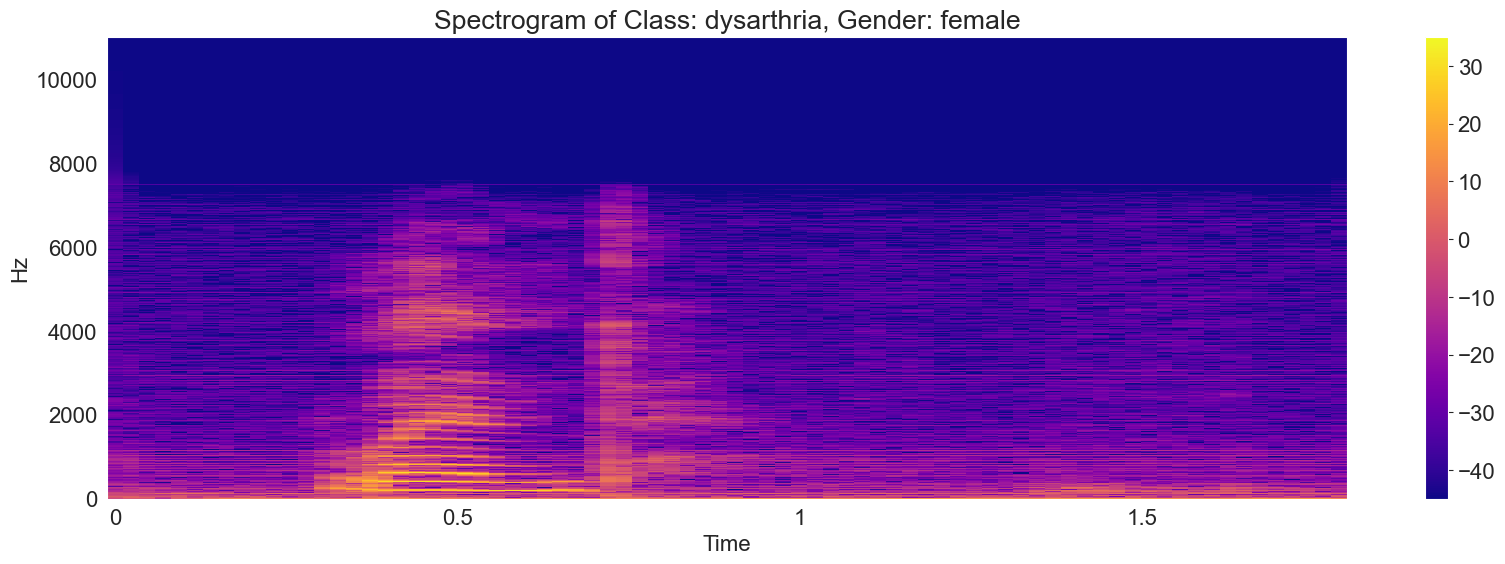

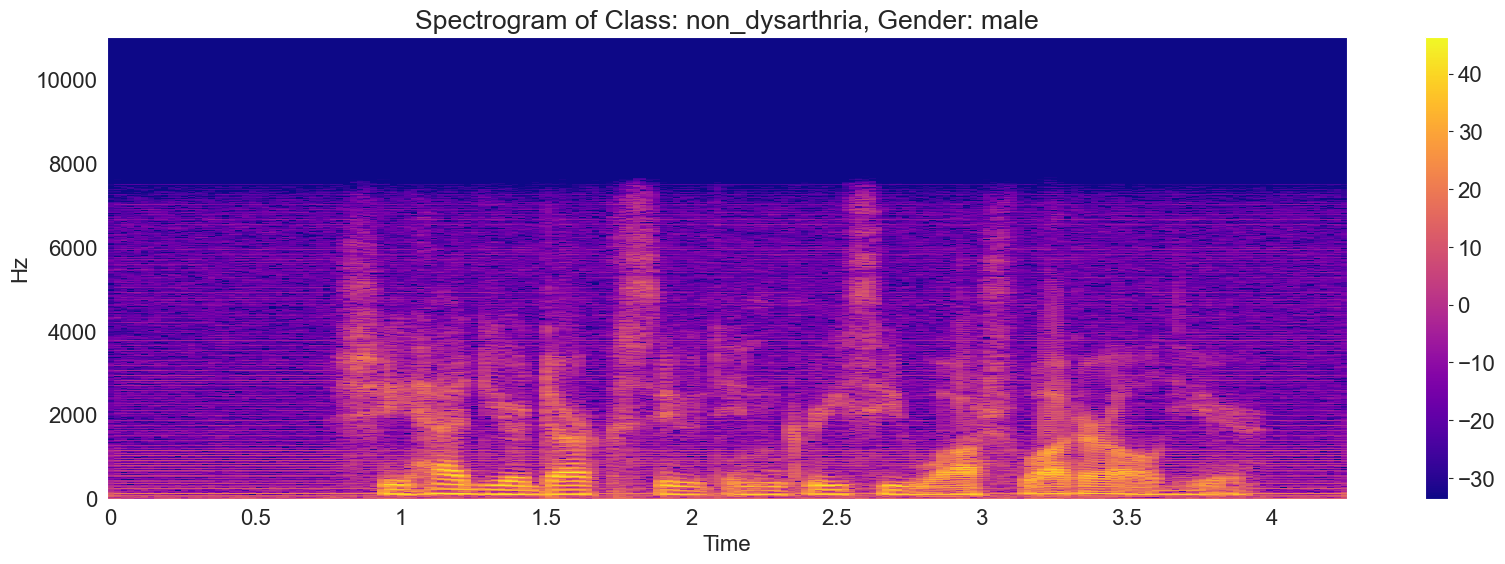

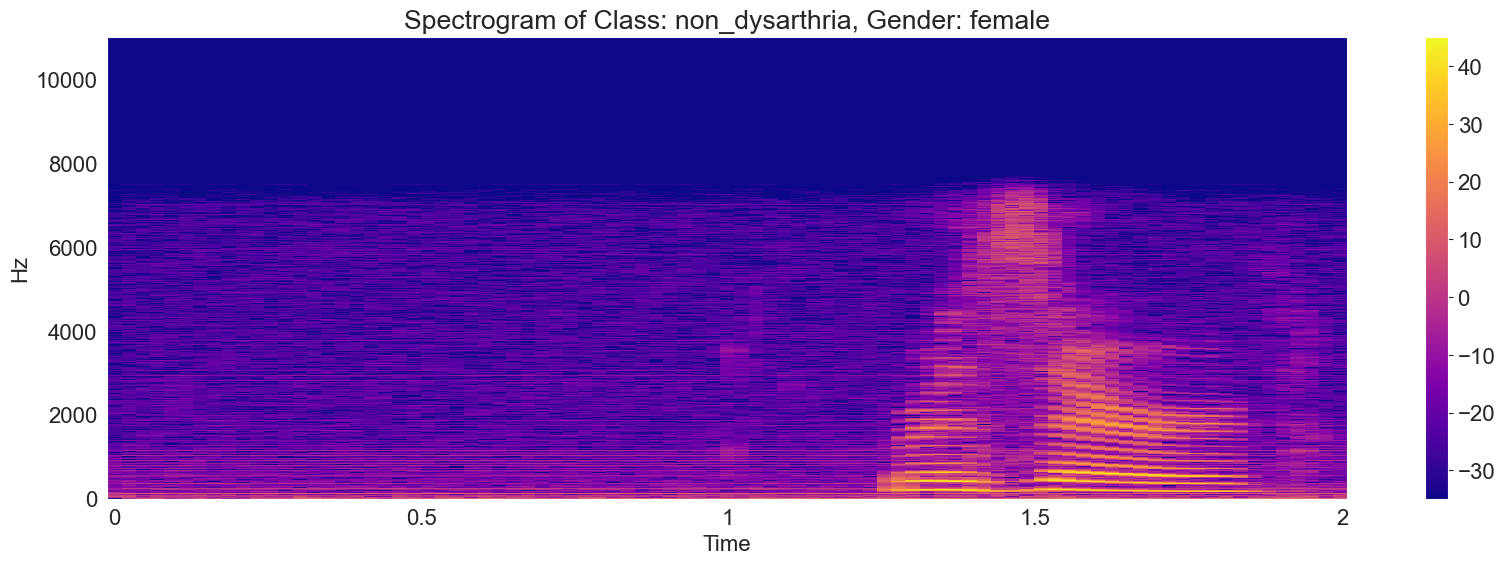

In [10]:
show_spectrogram(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectrogram(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectrogram(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectrogram(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## MFCCs
- For dysarthric samples the MFCC visualization has much more darker and concentrated pixels indicating the slurs present in their speech
- For non dysarthric it is not as concentrated and is more spread out 

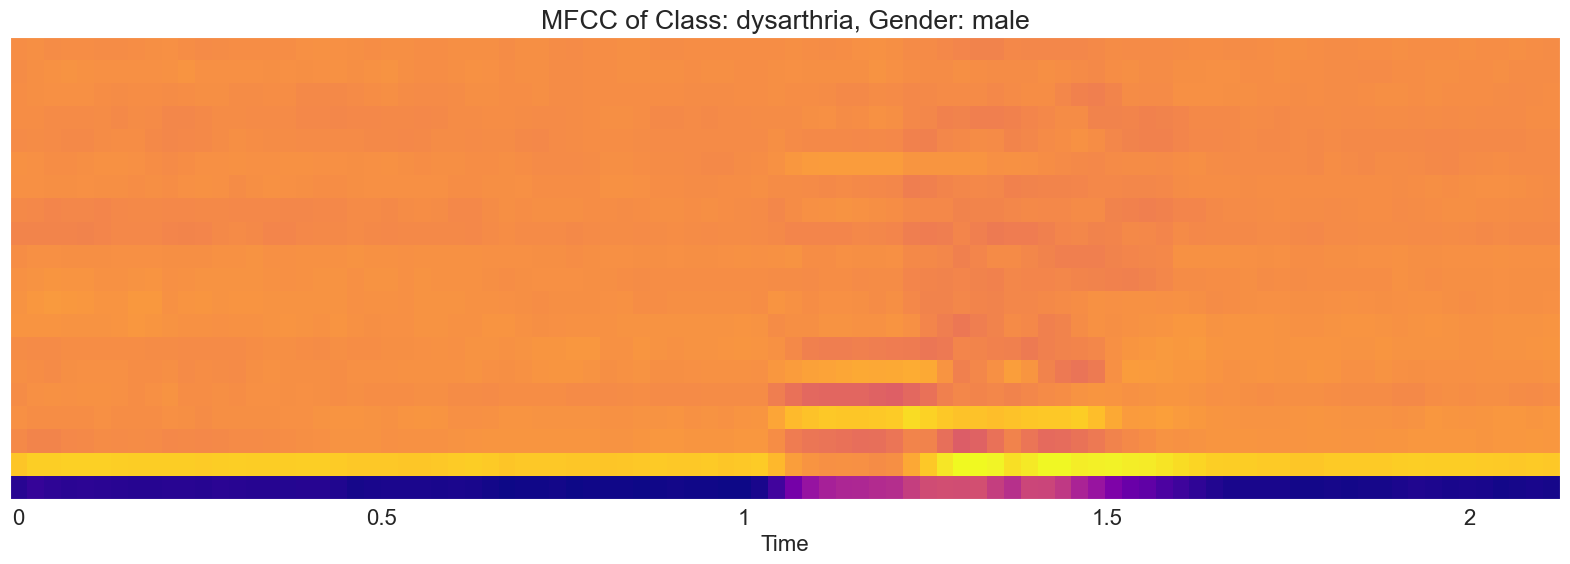

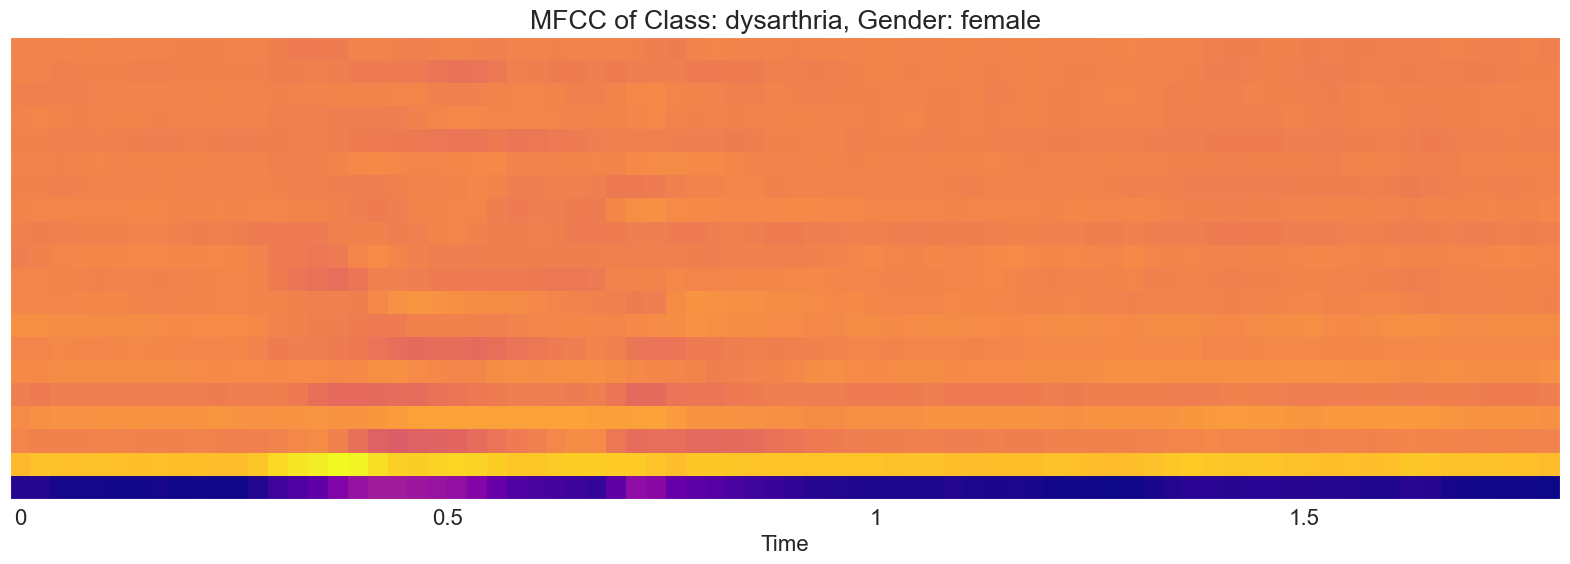

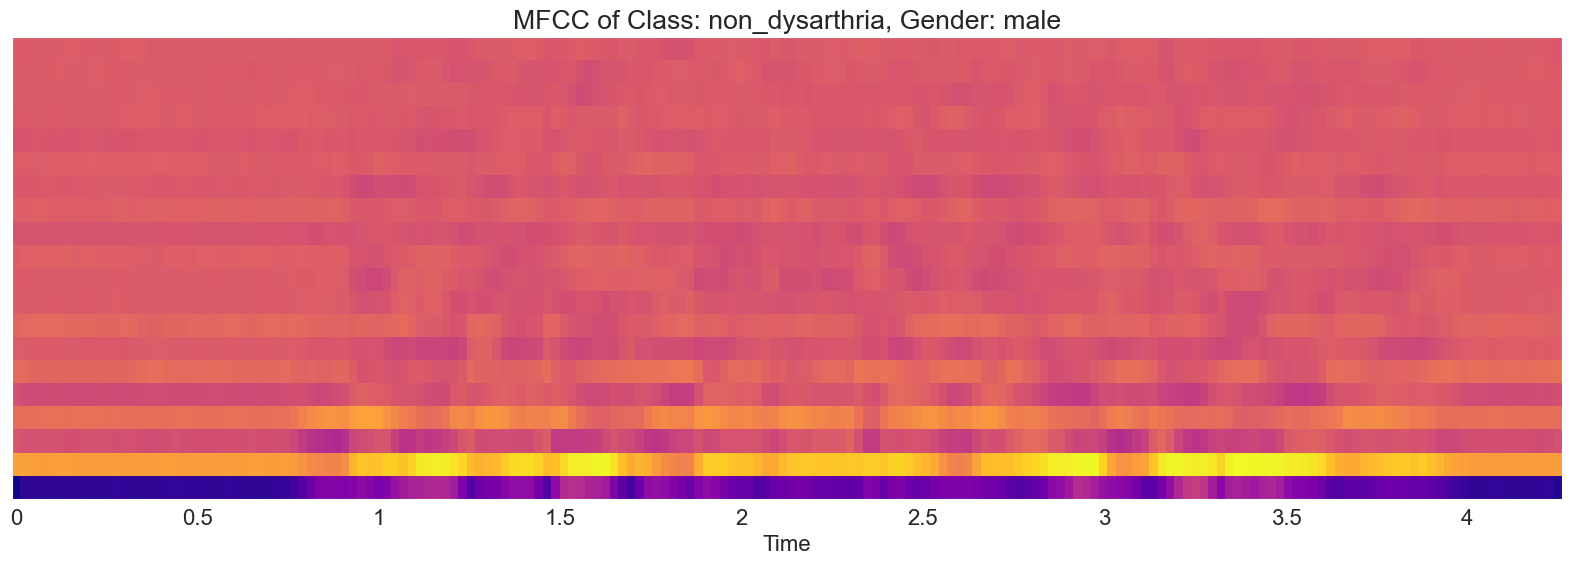

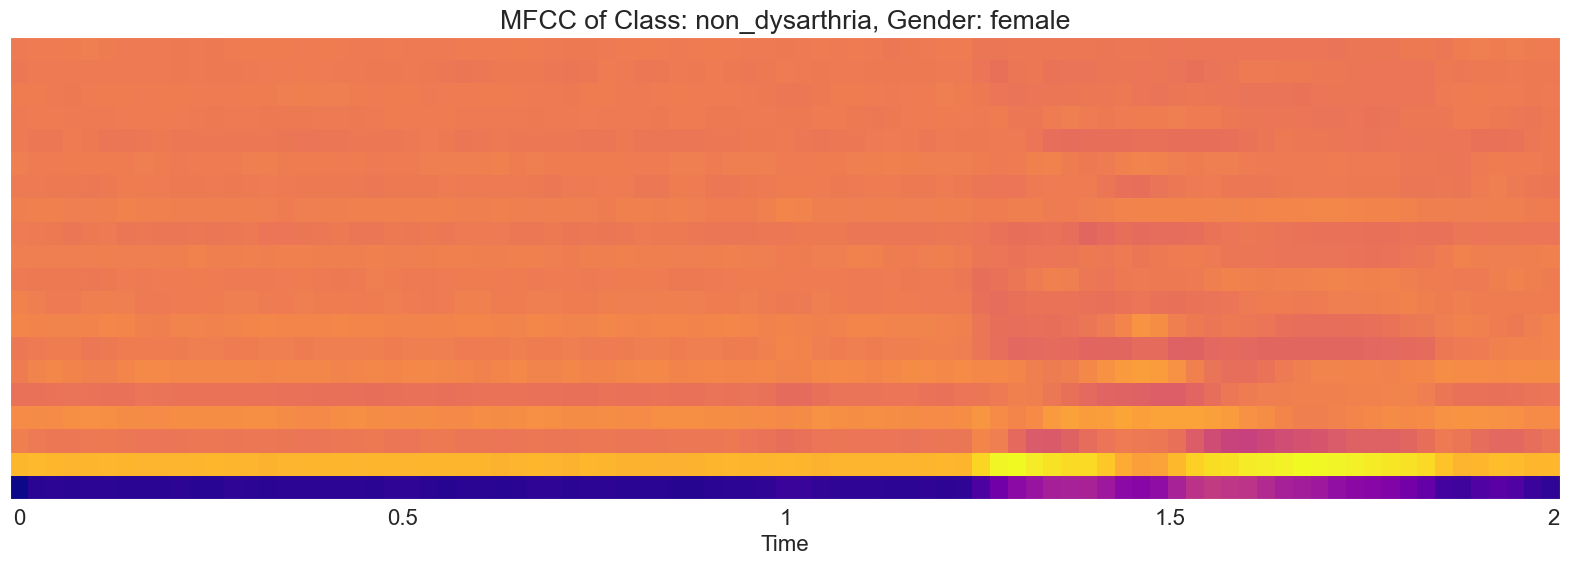

In [11]:
show_mfccs(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_mfccs(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_mfccs(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_mfccs(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Mel Spectrogram
- The Spectrogram converted to Mel scale is showing the magnitudes that are more perceptual to the human ears generally
- Patterns in the mel spectrograms of the dysarthric samples are somewhat indicative of the slurs in the speech 

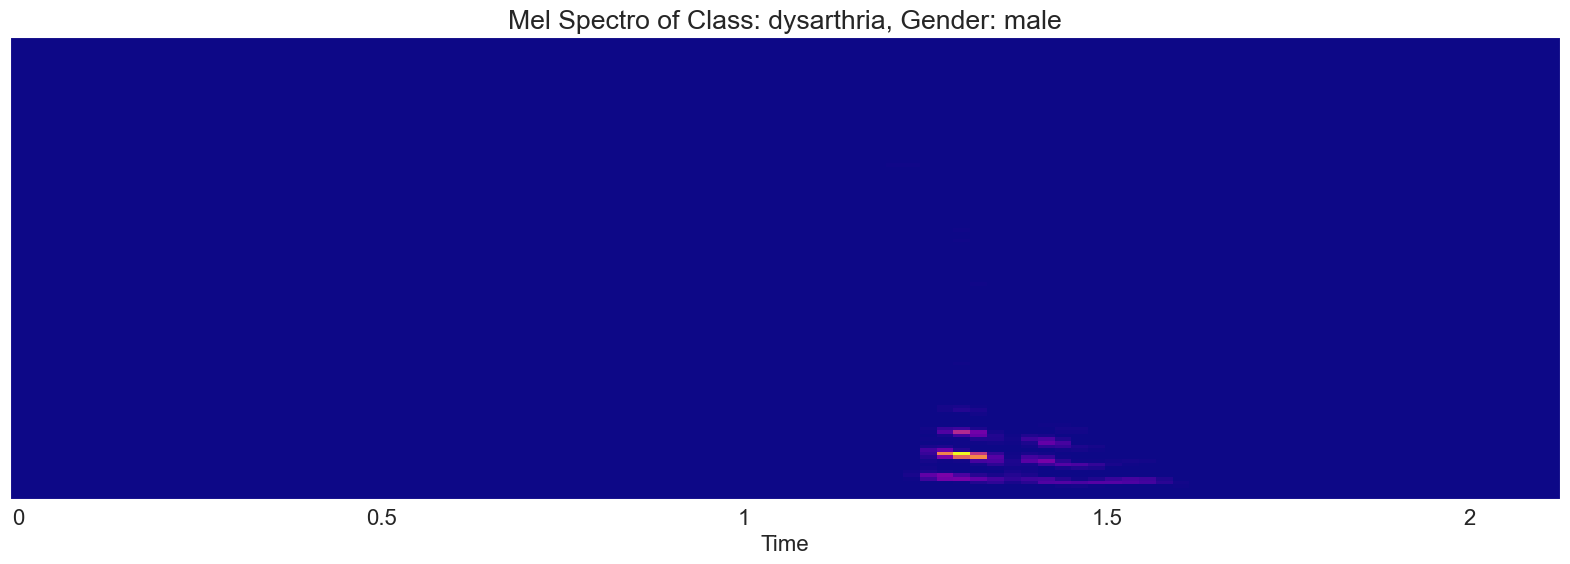

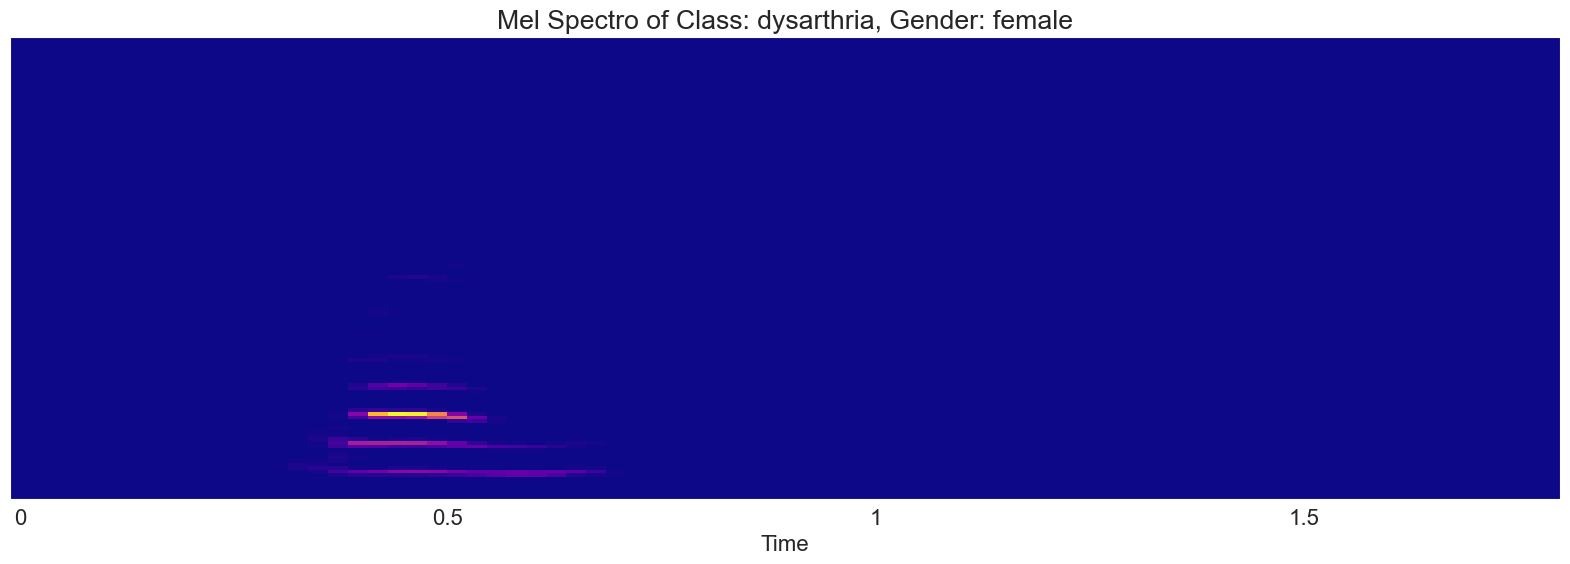

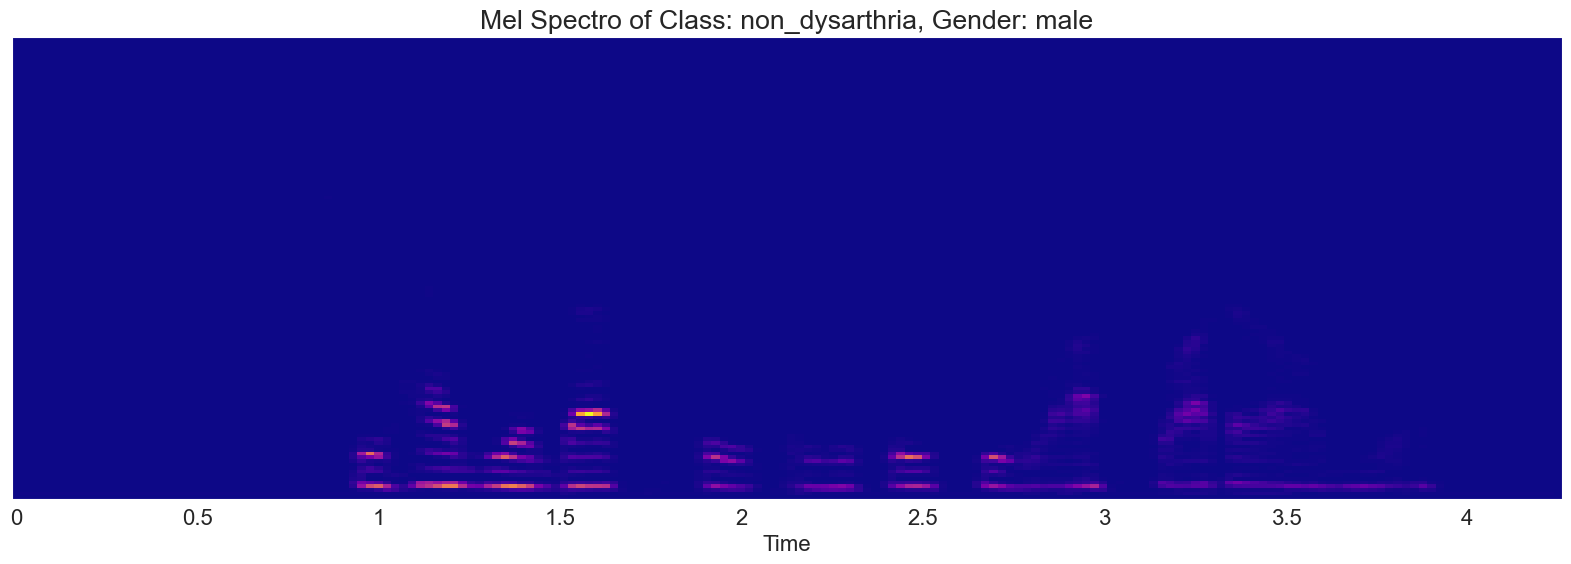

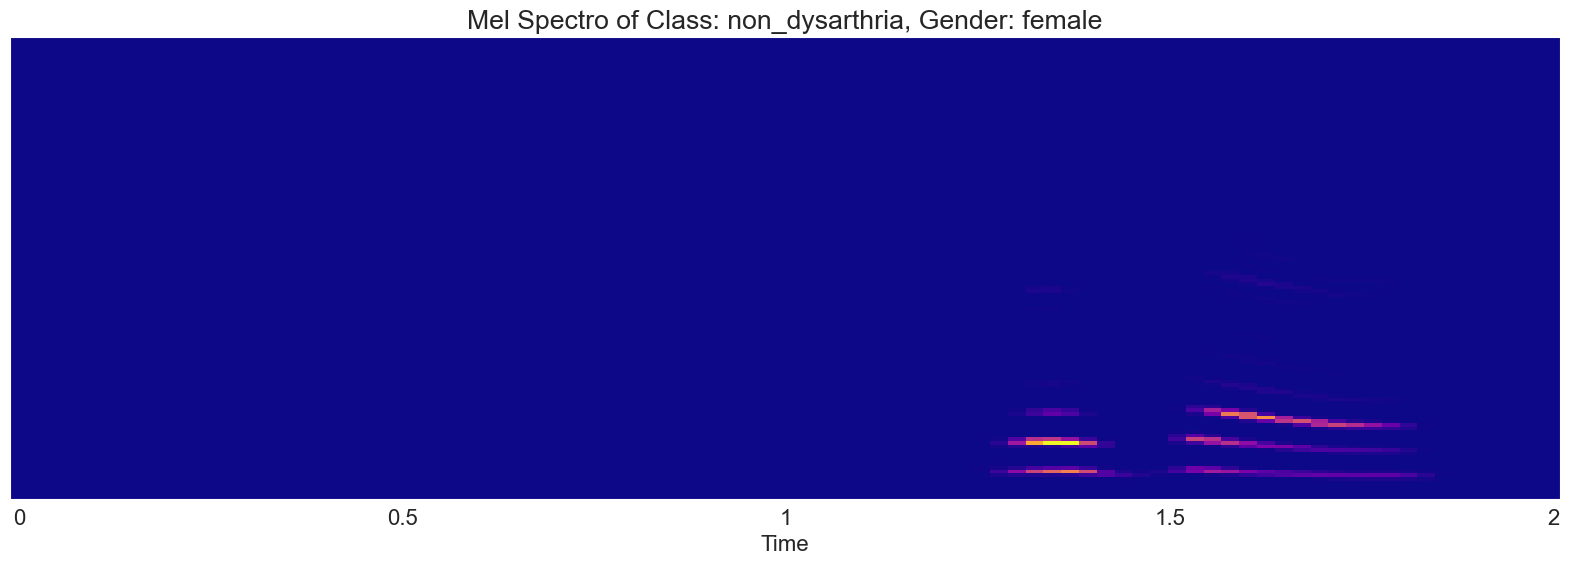

In [12]:
show_melspectro(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_melspectro(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_melspectro(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_melspectro(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

# Feature Extraction
- Extracts 128 MFCC Features, which was the maximum possible features during the extraction process

In [13]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [14]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    return dataf

In [15]:
dataf = feature_extraction(data)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:31<00:00, 63.05it/s]


In [16]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-221.788269,101.259232,-16.548130,38.492065,-13.595653,20.772556,-5.536350,10.410690,1.962461,-0.799047,...,0.962193,0.744855,1.058080,0.388452,0.081758,0.546173,0.594357,0.170033,-0.219215,non_dysarthria
1,-299.520081,109.872574,-17.097269,38.854965,-16.881128,22.959133,1.824229,18.724186,3.448542,4.455821,...,1.105589,1.056284,1.252576,0.027334,-1.368950,-0.037858,0.020661,-0.082124,-0.744832,non_dysarthria
2,-302.950043,112.048477,-23.679884,44.887421,-22.434727,26.299335,0.811477,18.210293,4.344697,4.912156,...,0.844332,0.530004,1.018391,0.055385,-1.472087,0.295324,0.191228,-0.224301,-0.582725,non_dysarthria
3,-210.861603,116.504486,-35.046497,37.670425,-27.112514,25.593727,-7.511986,13.140749,-0.587346,4.138087,...,0.630752,0.898458,0.721398,0.174576,-0.090706,0.001523,0.360465,-0.075449,-0.259715,non_dysarthria
4,-280.227203,104.505035,-17.209875,45.064884,-15.542122,28.115068,-3.449209,16.841440,4.573241,1.738297,...,1.596206,0.970084,0.732016,0.547593,-0.152664,0.131892,-0.288227,-0.468570,-0.461727,non_dysarthria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-304.231995,115.359306,-0.794754,26.543358,-0.682194,13.183391,2.389221,4.290236,-1.372811,-2.624720,...,0.473923,0.103740,0.311736,0.015566,-0.055351,0.193023,0.332825,0.014454,-0.221990,dysarthria
1995,-457.822144,110.087807,22.221979,-0.056085,-11.181320,3.190084,-4.499057,4.474745,5.809544,-1.913330,...,0.622935,0.508349,0.398737,0.455839,0.348569,0.286896,0.150860,-0.052999,0.001200,dysarthria
1996,-371.546875,116.846909,5.667271,22.488144,8.221016,7.740130,8.989119,9.996635,4.383993,3.590930,...,0.240279,-0.009779,-0.018253,-0.014394,-0.263360,0.556256,0.749682,-0.283888,-0.398581,dysarthria
1997,-302.500702,112.511185,-4.506542,32.498363,-1.519380,4.109806,4.611475,9.744307,-2.962906,-3.497743,...,0.146675,-0.200982,0.388719,0.160433,-0.383473,0.417756,1.042827,-0.082762,-0.111989,dysarthria


In [17]:
dataf.loc[dataf['class']=='non_dysarthria','class'] = 0
dataf.loc[dataf['class']=='dysarthria','class'] = 1
dataf['class'] = dataf['class'].astype(int)

X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1]

In [18]:
X.shape, y.shape

((1999, 128), (1999,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

# Modelling

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 4, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model_name = "Dysarthiria_Model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [24]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
54/57 [===========================>..] - ETA: 0s - loss: 0.6812 - accuracy: 0.7205
Epoch 1: val_loss improved from inf to 0.47724, saving model to Dysarthiria_Model.h5
57/57 [==============================] - 2s 14ms/step - loss: 0.6711 - accuracy: 0.7226 - val_loss: 0.4772 - val_accuracy: 0.7800
Epoch 2/50
53/57 [==========================>...] - ETA: 0s - loss: 0.3647 - accuracy: 0.8361
Epoch 2: val_loss improved from 0.47724 to 0.28902, saving model to Dysarthiria_Model.h5
57/57 [==============================] - 1s 10ms/step - loss: 0.3628 - accuracy: 0.8405 - val_loss: 0.2890 - val_accuracy: 0.8750
Epoch 3/50
53/57 [==========================>...] - ETA: 0s - loss: 0.2311 - accuracy: 0.9139
Epoch 3: val_loss improved from 0.28902 to 0.15479, saving model to Dysarthiria_Model.h5
57/57 [==============================] - 1s 11ms/step - loss: 0.2269 - accuracy: 0.9166 - val_loss: 0.1548 - val_accuracy: 0.9750
Epoch 4/50
52/57 [==========================>...] - ETA: 0s - los

Epoch 29/50
51/57 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 29: val_loss did not improve from 0.00474
57/57 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 30/50
56/57 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 30: val_loss did not improve from 0.00474
57/57 [==============================] - 1s 10ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 31/50
57/57 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 31: val_loss did not improve from 0.00474
57/57 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 32/50
56/57 [============================>.] - ETA: 0s - loss: 8.2694e-04 - accuracy: 1.0000
Epoch 32: val_loss did not improve from 0.00474
57/57 [===========================

# Model Summary


## Learning Curves

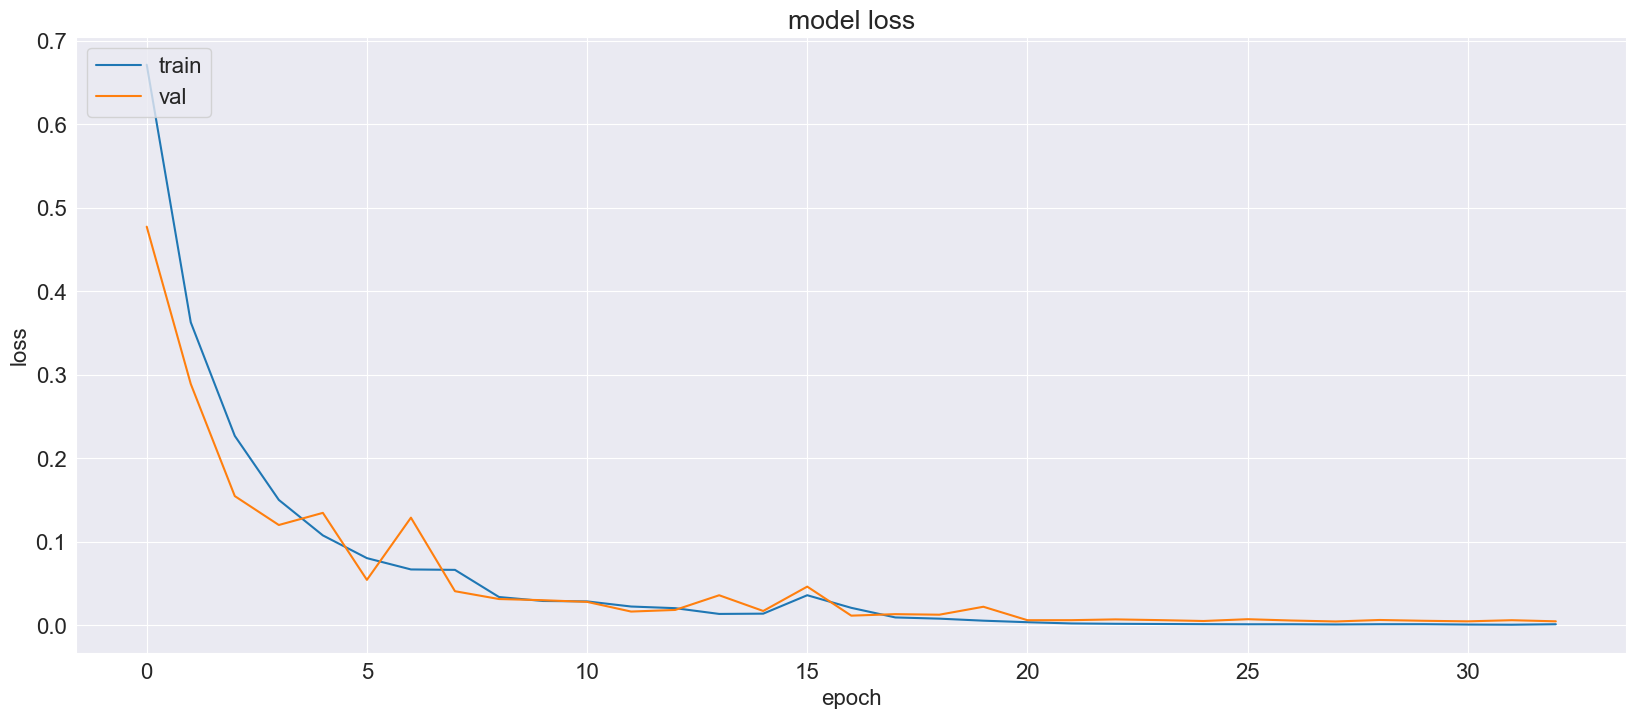

In [25]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

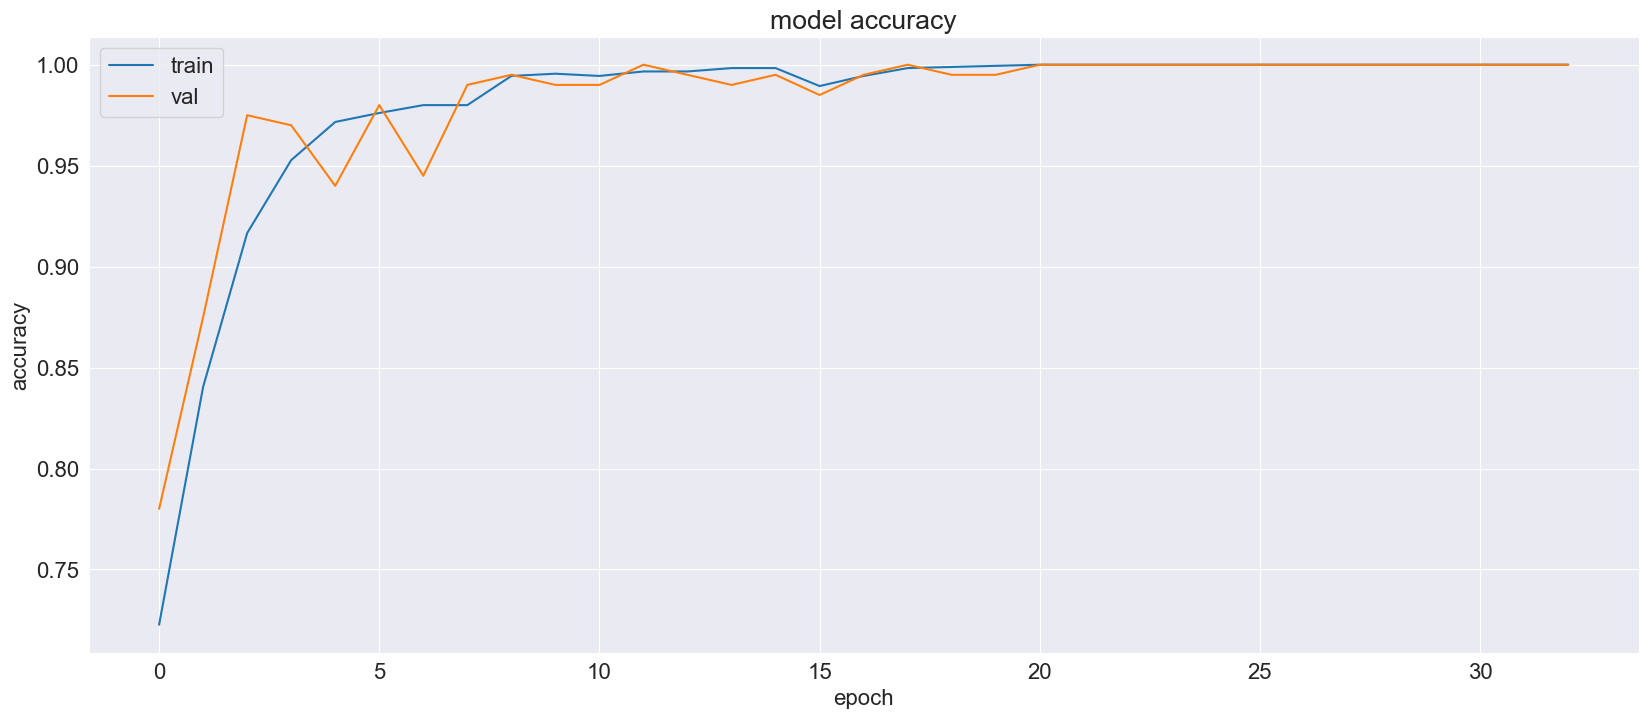

In [26]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


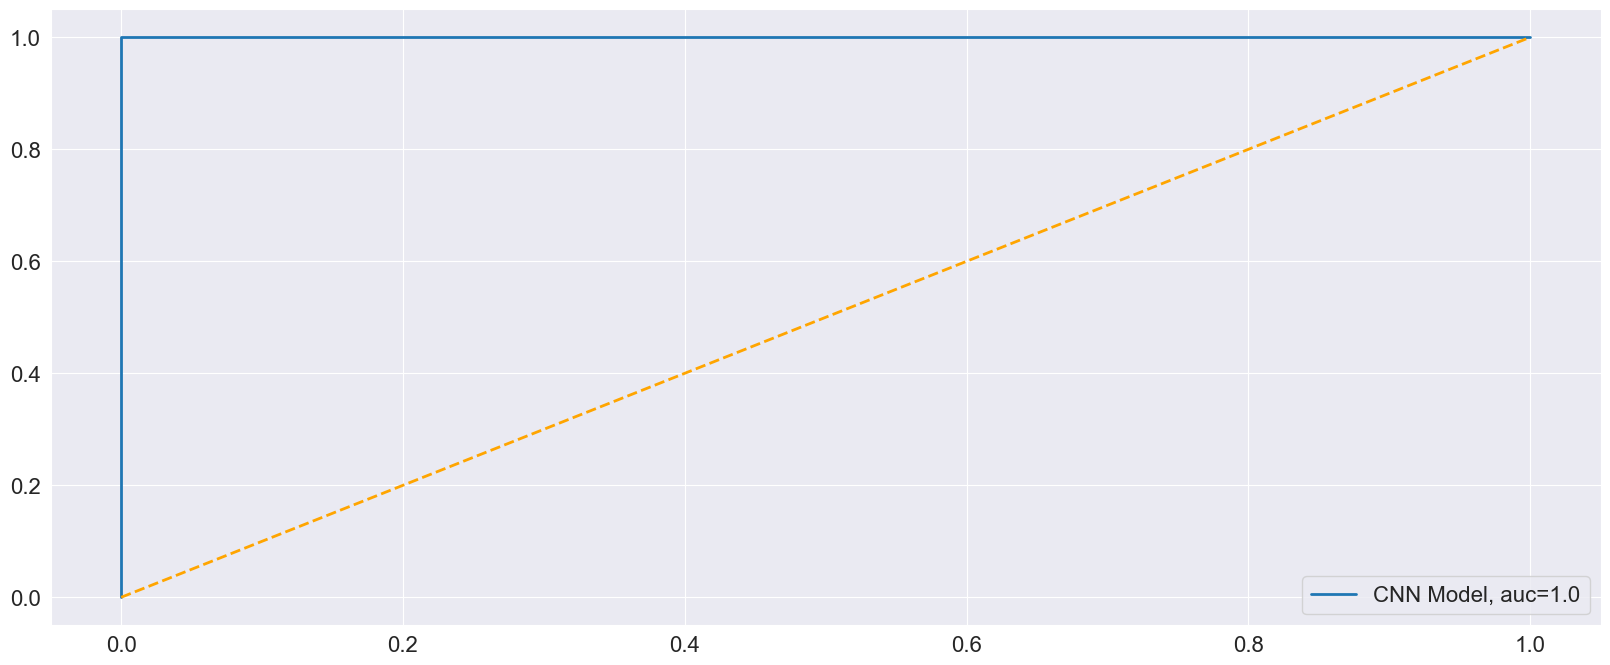

In [28]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [29]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

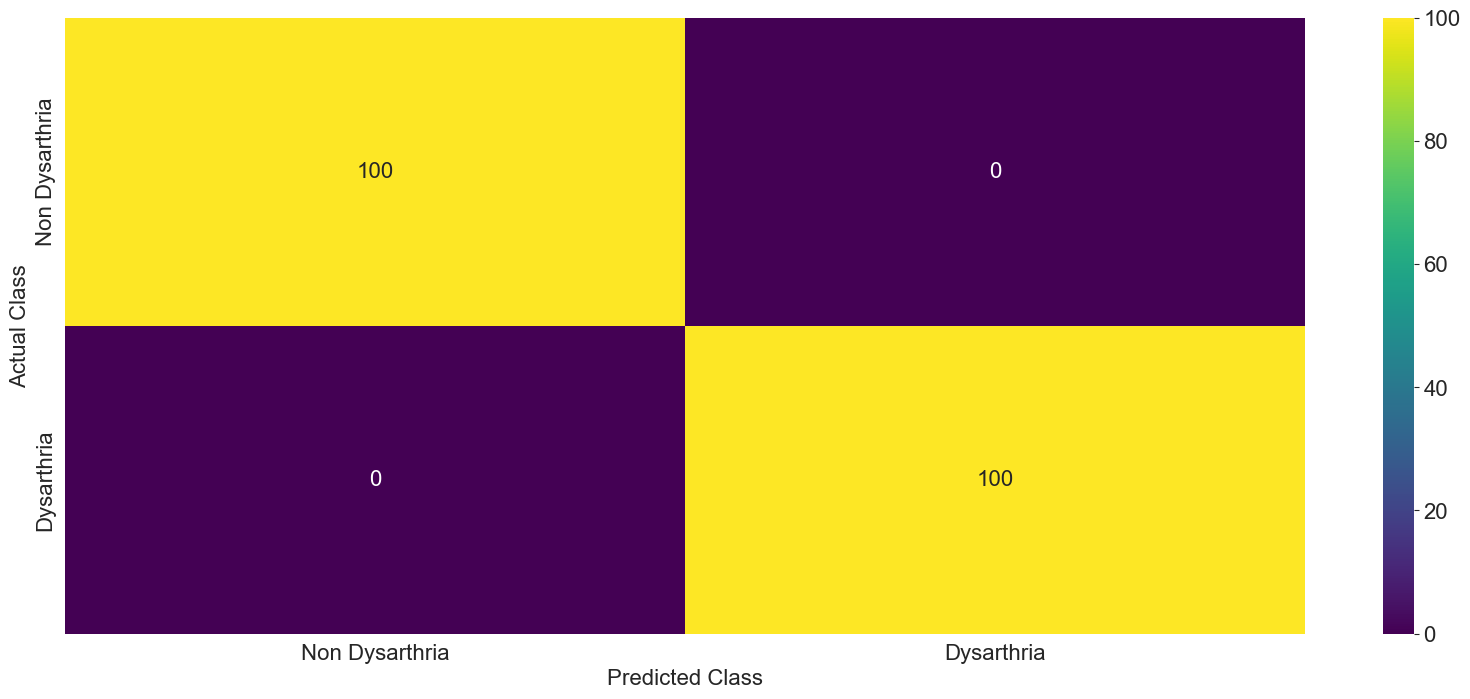

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Logistic Regresion Model

In [32]:
x = dataf.drop(columns='class')
y = dataf['class']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

lgr = LogisticRegression()
lgr.fit(xtrain, ytrain)
pred_lgr = lgr.predict(xtest)

In [34]:
print(f"Training Accuracy :", lgr.score(xtrain, ytrain))
print(f"Testing Accuracy :", lgr.score(xtest, ytest))
print(f"Classification Report :",classification_report(ytest, pred_lgr))

Training Accuracy : 0.957473420888055
Testing Accuracy : 0.9425
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.95      0.94       202
           1       0.95      0.93      0.94       198

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
pred_dtc = dtc.predict(xtest)

In [36]:
print(f"Training Accuracy :", dtc.score(xtrain, ytrain))
print(f"Testing Accuracy :", dtc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_dtc))

Training Accuracy : 1.0
Testing Accuracy : 0.9175
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.93      0.92       202
           1       0.93      0.90      0.92       198

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



# # Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
pred_rfc = rfc.predict(xtest)

In [38]:
print(f"Training Accuracy :", rfc.score(xtrain, ytrain))
print(f"Testing Accuracy :", rfc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_rfc))

Training Accuracy : 1.0
Testing Accuracy : 0.99
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       202
           1       0.99      0.98      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# Ada-Boost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(estimator=rfc, learning_rate=0.001)
abc.fit(xtrain, ytrain)
pred_abc = abc.predict(xtest)

In [40]:
print(f"Training Accuracy :", abc.score(xtrain, ytrain))
print(f"Testing Accuracy :", abc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_abc))

Training Accuracy : 1.0
Testing Accuracy : 0.9875
Classification Report :               precision    recall  f1-score   support

           0       0.98      1.00      0.99       202
           1       0.99      0.98      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# BaggingClassifier

In [41]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator=rfc)
bc.fit(xtrain, ytrain)
pred_bc = bc.predict(xtest)

In [42]:
print(f"Training Accuracy :", bc.score(xtrain, ytrain))
print(f"Testing Accuracy :", bc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_bc))

Training Accuracy : 0.9987492182614134
Testing Accuracy : 0.98
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.99      0.98       202
           1       0.98      0.97      0.98       198

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
pred_gbc = gbc.predict(xtest)

In [44]:
print(f"Training Accuracy :", gbc.score(xtrain, ytrain))
print(f"Testing Accuracy :", gbc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_gbc))

Training Accuracy : 1.0
Testing Accuracy : 0.9925
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.99      0.99       202
           1       0.99      0.99      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# XGB Classifier

In [45]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(xtrain, ytrain)
pred_xgbc = xgbc.predict(xtest)

In [46]:
print(f"Training Accuracy :", xgbc.score(xtrain, ytrain))
print(f"Testing Accuracy :", xgbc.score(xtest, ytest))
print(f"Classification Report :", classification_report(ytest, pred_xgbc))

Training Accuracy : 1.0
Testing Accuracy : 0.99
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99       202
           1       0.98      0.99      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# Support Vector Classifier

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x2 = dataf.drop(columns='class')
x2 = sc.fit_transform(x2)
y2 = dataf['class']

x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [48]:
svc = SVC()
svc.fit(x2train, y2train)
pred_svc = svc.predict(x2test)

In [49]:
print(f"Training Accuracy :", svc.score(x2train, y2train))
print(f"Testing Accuracy :", svc.score(x2test, y2test))
print(f"Classification Report :", classification_report(y2test, pred_svc))

Training Accuracy : 0.99812382739212
Testing Accuracy : 0.9975
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       0.99      1.00      1.00       198

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier()
knnc.fit(x2train, y2train)
pred_knnc = knnc.predict(x2test)

In [51]:
print(f"Training Accuracy :", knnc.score(x2train, y2train))
print(f"Testing Accuracy :", knnc.score(x2test, y2test))
print(f"Classification Report :", classification_report(y2test, pred_knnc))

Training Accuracy : 0.9893683552220137
Testing Accuracy : 0.9875
Classification Report :               precision    recall  f1-score   support

           0       0.98      1.00      0.99       202
           1       0.99      0.98      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [54]:
#Comparing the results

Result_Table = {
            "Models" : [
                "Convolutional Neural Network",
                "Logistic Regression",
                "Decission Tree Classifier",
                "Random Forest Classifier",
                "AdaBoost Classifier",
                "Bagging Classifier",
                "Gradient Boosting Classifier",
                "Extreme Gradient Boosting Classifier",
                "Support Vector Classifier",
                "K-Nearest Neighbours Classifier"
            ],
                
            "Accuracy_Sore" : [
                "1.0","0.94","0.92","0.99","0.99","0.98","0.99","0.99","1.0","0.99"]  
}

In [55]:
Result_Table = pd.DataFrame(Result_Table)
Result_Table

,Models,Accuracy_Sore
0,Convolutional Neural Network,1.0
1,Logistic Regression,0.94
2,Decission Tree Classifier,0.92
3,Random Forest Classifier,0.99
4,AdaBoost Classifier,0.99
5,Bagging Classifier,0.98
6,Gradient Boosting Classifier,0.99
7,Extreme Gradient Boosting Classifier,0.99
8,Support Vector Classifier,1.0
9,K-Nearest Neighbours Classifier,0.99
